In [1]:
import numpy as np

In [2]:
%matplotlib inline

In [3]:
from matplotlib import pyplot as plt

In [86]:
# Cross entropy cost function defined as sum over i -targeti*log(outputi)
# So dcdoutput is -target * 1/outputi

def l(target, output):
    return np.sum(-1 * target * np.log(output))

def lp(target, output):
    return -1 * target * 1./output

In [87]:
def fp(f, x):
    return (f(x+.000001) - f(x)) / .000001

In [88]:
l(1, 3)

-1.0986122886681098

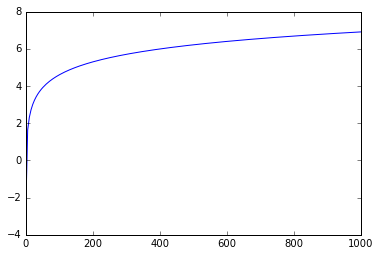

In [89]:
# Graph the base-10 logarithm function

t = np.linspace(0.1, 1000, 200)
plt.plot(t, np.log(t))

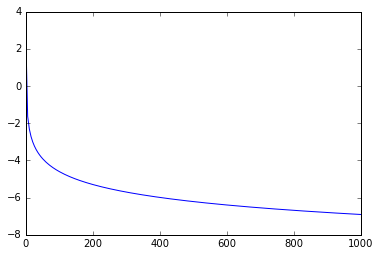

In [90]:
plt.plot(t, -np.log(t))

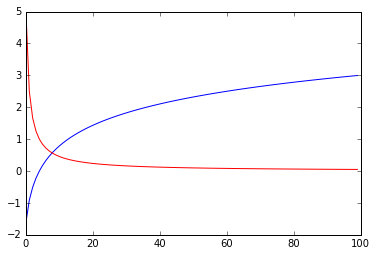

In [91]:
# Graph the log and log' functions

tt = np.linspace(.2, 20, 100)

plt.plot(np.log(tt), 'b-')
plt.plot(fp(np.log, tt), 'r-')

In [92]:
# The derivative of log is very high for small values

print "dlog/dx .1 is approx", fp(np.log, .1)
print "dlog/dx .01 is approx", fp(np.log, .01)
print "dlog/dx .001 is approx", fp(np.log, .001)

dlog/dx .1 is approx 9.99995000006
dlog/dx .01 is approx 99.9950003324
dlog/dx .001 is approx 999.500333084


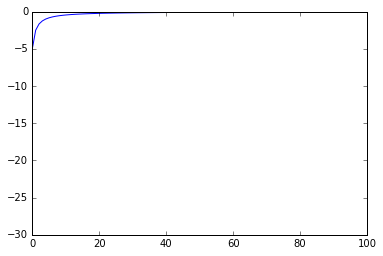

In [93]:
# Plot the derivative of cross entropy function and analytically derived derivative of cost function

tt = np.linspace(.2, 20, 100)

plt.plot(fp(lambda x:l(1.0, x), tt), 'r-')
plt.plot(lp(1.0, tt), 'b-')

In [94]:
# Try out different targets and outputs

print "Same target and output at 1.0 cost is", l(1.0, 1.0)
print "Same target and output at 10.0 cost is", l(10.0, 10.0)

Same target and output at 1.0 cost is 0.0
Same target and output at 10.0 cost is -23.0258509299


In [95]:
# Huh.. that's interesting, when the target and output of the model are the same and large, the cost is large negative
# What happens when the target is large and the output is small

print "Large target and small output cost is", l(10.0, 0.001)

Large target and small output cost is 69.0775527898


In [96]:
# What about when the target is small and output is large

print "Small target and large output cost is", l(0.001, 10.0)

Small target and large output cost is -0.00230258509299


In [103]:
# Huh... the cost is... small... and negative? For such differing values.. What does this mean!!!

# A small target and large output of the model is actually good? Why? It seems as if it'd be
# the opposite. Perhaps it has to do with the derivative

print "Derivative of cross entropy with a small target and large model output", lp(0.001, 10.0)

Derivative of cross entropy with a small target and large model output -0.0001


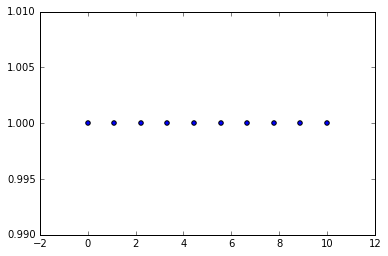

In [117]:
# Well that wasn't it.. The derivative is pretty small, most likely to do with the target multiplied directly to log'
# However, you can differentiate the cross entropy cost w.r.t. the logits... And you get a cleaner outcome

# That means we need to introduce the softmax function on logits

def softmax(z):
    return np.exp(z)/np.sum(np.exp(z))

def softmaxp(z):
    return 1.0 # Dunno!

test_z = 0
for test_z in np.linspace(0, 10, 10):
    plt.scatter(test_z, softmax(test_z))

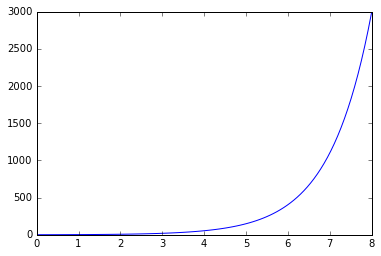

In [122]:
# Graph exp function

t = np.linspace(0, 8, 100)
plt.plot(t, np.exp(t))

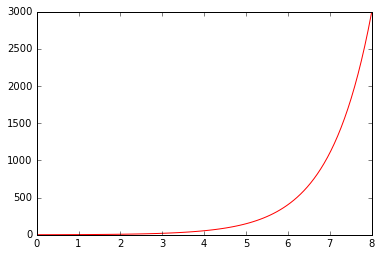

In [123]:
# Graph exp' function, (which is just exp!!!)

plt.plot(t, fp(np.exp, t), 'r-')

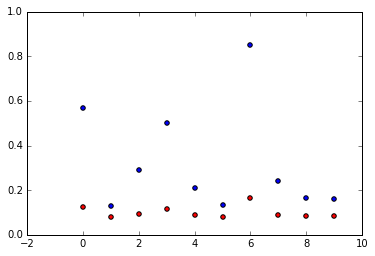

In [105]:
z = np.random.random_sample((10))

plt.scatter(np.arange(s.shape[0]), z, c='b')
plt.scatter(np.arange(s.shape[0]), softmax(z), c='r')

In [106]:
# Note that the softmax of a list of values adds up to one:
print np.sum(softmax(z))

1.0


In [107]:
# In that way (and in that way only, to my knowledge) we can think of it as a probability distribution

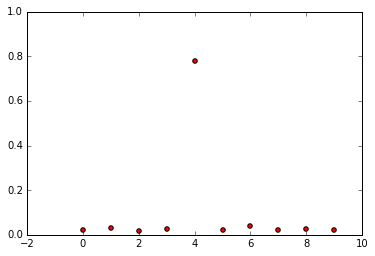

In [108]:
# What happens when a value is far larger than the others?
from IPython.html.widgets import interact
from IPython.display import clear_output

z = np.random.random_sample((10))

def one_z_to_rule_them_all(zi=.2):
    z[4] = zi
    plt.axis([-2, 10, 0, 1])
    #plt.scatter(np.arange(s.shape[0]), z, c='b')
    plt.scatter(np.arange(s.shape[0]), softmax(z), c='r')
    
interact(one_z_to_rule_them_all, zi=(0, 5, .1))

In [126]:
# Your target is most likely going to be all 0s and a single 1 in the location of the correct class...
# So the matrix multiplication in the cross entropy can be simplified

# You'll be left with dc/dyi = -1 * 1/yi
# i being the location of the 1 in the target

# target: [0, 0, 0, 0, 1,     0, 0, 0]
# dc/dy:  [0, 0, 0, 0, -1/yi, 0, 0, 0]

# The derivative of the softmax w.r.t. zi is.. definitely not what I wrote!
def softmaxp(zi):
    np.exp(zi)/np.exp(zi) # This looks like 1.. that's pretty wild

# As you take this delta towards the derivative of the softmax w.r.t. its logits z you get:
pass

<a href="http://stats.stackexchange.com/questions/79454/softmax-layer-in-a-neural-network">See this for help!</a>